# NLP (Natural Languaje Processing)
NLP (Natural Languaje Processing) es una campo de la informática que se enfoca en la interacción entre las computadoras y el lenguaje humano. 
Existen diversas biblitecas tales como:
- **NLTK (Natural Language Toolkit):** un conjunto de herramientas de código abierto para tareas básicas de NLP como tokenización, etiquetado, análisis sintáctico y semántico.
- **spacy:** una biblioteca moderna y eficiente para NLP que ofrece procesamiento de lenguaje de última generación, incluyendo modelos pre-entrenados para diversas tareas.
- **TextBlob:** una biblioteca basada en NLTK que facilita el análisis de texto con funcionalidades como corrección ortográfica, análisis de sentimiento y extracción de entidades.


Para este cuaderno en concreto vamos analizar los comentarios en cada uno de los dataframes en top_200 y bottom_200.

In [4]:
# Importamos librerias necesarias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio
import seaborn as sns
from plotly import graph_objects as go
import plotly.subplots as sp

# Extracción de datos
import nltk
from langdetect import detect
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud


In [42]:
# Mostrar todas las columnas y filas de nuestro dataframes
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Configuración del formato de numeros
pd.options.display.float_format = '{:.2f}'.format

In [5]:
# Leemos los dataframes que vamos a utilizar
top_200 = pd.read_csv(r'/Users/juliobrionesmorales/Documents/GitHub/Airbnb_Barcelona/data/4. top200/top_200.csv')
bottom_200 = pd.read_csv(r'/Users/juliobrionesmorales/Documents/GitHub/Airbnb_Barcelona/data/4. top200/bottom_200.csv')
df_reviews = pd.read_csv(r'/Users/juliobrionesmorales/Documents/GitHub/Airbnb_Barcelona/data/3. data_sin_outliers/df_reviews')

In [34]:
df_reviews.shape

(833555, 3)

### Analisis de dataframes para solo dejar las columnas con letras-palabras

##### TOP_200

In [35]:
top_200.head()

id  neighbourhood_cleansed neighbourhood_group_cleansed  \
0 968720450586425984.00  Sant Gervasi - Galvany          Sarrià-Sant Gervasi   
1           50861575.00      la Sagrada Família                     Eixample   
2           51759096.00  Sant Gervasi - Galvany          Sarrià-Sant Gervasi   
3 744806258021033088.00       la Vila de Gràcia                       Gràcia   
4           52933728.00       la Vila de Gràcia                       Gràcia   

               property_type        room_type  latitude  longitude  price  \
0         Entire rental unit  Entire home/apt     41.39       2.14 248.00   
1  Entire serviced apartment  Entire home/apt     41.40       2.18 122.00   
2         Entire rental unit  Entire home/apt     41.40       2.15 148.00   
3         Entire rental unit  Entire home/apt     41.40       2.16 208.00   
4         Entire rental unit  Entire home/apt     41.40       2.16 159.27   

   minimum_nights  maximum_nights  accommodates  bedrooms  beds  \
0           76.00          330.00          6.00      3.00  4.00   
1           76.00         1124.00          6.00      3.00  3.00   
2           76.00          330.00          6.00      3.00  3.00   
3           76.00          330.00          4.00      3.00  3.00   
4           76.00          330.00          2.00      1.00  2.82   

   number_of_reviews  number_of_reviews_ltm  reviews_per_month  \
0               0.00                   0.00               1.86   
1               2.00                   2.00               0.29   
2               0.00                   0.00               1.00   
3               0.00                   0.00               1.61   
4               0.00                   0.00               1.09   

   review_scores_rating  review_scores_cleanliness  \
0                  4.49                       4.62   
1                  4.50                       4.00   
2                  4.25                       4.33   
3                  4.77                       4.84   
4                  4.64                       4.64   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         4.51                    4.68                 4.26   
1                         5.00                    4.50                 5.00   
2                         4.50                    4.86                 4.20   
3                         4.71                    4.93                 4.58   
4                         4.73                    4.78                 4.51   

  host_is_superhost host_response_rate  host_listings_count  availability_365  \
0                 f                97%                97.00            328.00   
1                 f                98%                97.00             76.00   
2                 f                97%                97.00            106.00   
3                 f                97%                97.00            289.00   
4                 f                97%                97.00             43.00   

   price_normalized  weighted_score  
0              0.28           29.97  
1              0.66           29.88  
2              0.58           29.77  
3              0.40           29.41  
4              0.55           28.78

In [36]:
tarjet = ['id','neighbourhood_cleansed','neighbourhood_group_cleansed','property_type', 'room_type']

top_200 = top_200[tarjet]

##### BOTTOM_200

In [37]:
tarjet = ['id','neighbourhood_cleansed','neighbourhood_group_cleansed','property_type', 'room_type']

bottom_200 = bottom_200[tarjet]

##### DF_REVIEWS

In [38]:
df_reviews.head() # no es necesario quitar ninguna columna

listing_id reviewer_name                                           comments
0      360863          Anna  We stayed at  Humberto's apartment for 9 days ...
1       17475        Zoltan  Excellent host, beautiful apartment, great loc...
2       17475          John  Luca is very personable, and the views are exa...
3       17475      Xiaoyang  I am glad we found Luca's apt for our stay in ...
4       17475           Amy  I should start by saying we really did not wan...

### JUNTAMOS DATAFRAMES

In [39]:
# Juntamos dataframes de top200 con reviews a traves de sus id
top_200 = pd.merge(top_200, df_reviews, left_on='id', right_on='listing_id', how='inner')
bottom_200 = pd.merge(bottom_200, df_reviews, left_on='id', right_on='listing_id', how='inner')


In [40]:
top_200.head()

id neighbourhood_cleansed neighbourhood_group_cleansed  \
0 50861575.00     la Sagrada Família                     Eixample   
1 50861575.00     la Sagrada Família                     Eixample   
2 39571615.00               el Raval                 Ciutat Vella   
3 39548516.00               el Raval                 Ciutat Vella   
4 39548516.00               el Raval                 Ciutat Vella   

               property_type        room_type  listing_id reviewer_name  \
0  Entire serviced apartment  Entire home/apt    50861575        Elvira   
1  Entire serviced apartment  Entire home/apt    50861575         Eirik   
2         Entire rental unit  Entire home/apt    39571615         Muidh   
3         Entire rental unit  Entire home/apt    39548516        Stefan   
4         Entire rental unit  Entire home/apt    39548516         Goran   

                                            comments  
0  Жили в августе, 6 человек. Wifi для работы Оке...  
1  Great place to stay in the centre of Barcelona...  
2  كانت الشقة على أعلى المستويات  موقع جميل بقرب ...  
3  very clean and cool place. Big appartment on a...  
4  I loved the apartment and its location. The sh...

In [41]:
# Eliminamos tanto listing_id como id de nuestros dataframes
columnas_eliminar = ['id','listing_id']
top_200 = top_200.drop(columns=columnas_eliminar)
bottom_200 = bottom_200.drop(columns=columnas_eliminar)


In [42]:
# Mostramos el head
top_200.head(5)

neighbourhood_cleansed neighbourhood_group_cleansed  \
0     la Sagrada Família                     Eixample   
1     la Sagrada Família                     Eixample   
2               el Raval                 Ciutat Vella   
3               el Raval                 Ciutat Vella   
4               el Raval                 Ciutat Vella   

               property_type        room_type reviewer_name  \
0  Entire serviced apartment  Entire home/apt        Elvira   
1  Entire serviced apartment  Entire home/apt         Eirik   
2         Entire rental unit  Entire home/apt         Muidh   
3         Entire rental unit  Entire home/apt        Stefan   
4         Entire rental unit  Entire home/apt         Goran   

                                            comments  
0  Жили в августе, 6 человек. Wifi для работы Оке...  
1  Great place to stay in the centre of Barcelona...  
2  كانت الشقة على أعلى المستويات  موقع جميل بقرب ...  
3  very clean and cool place. Big appartment on a...  
4  I loved the apartment and its location. The sh...

In [43]:
top_200.shape

(196, 6)

In [44]:
bottom_200.shape

(5219, 6)

### Recuento de comentarios por idioma
La función **detect()** de la biblioteca **langdetect** se utiliza para detectar el idioma de un texto dado. 

In [43]:
# Definimos una función que detecta el idioma de un texto 
""" 
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'

# La aplicamos a la columna de comentarios a nuestros 2 dataframes
top_200['language'] = top_200['comments'].apply(detect_language)
bottom_200['language'] = bottom_200['comments'].apply(detect_language)

# Guardamos en csv debido a que es una libreria que tarda mucho y no queremos que se ejecute todo el rato, por eso lo dejamos con comentarios
import os
base_path = '/Users/juliobrionesmorales/Documents/GitHub/Airbnb_Barcelona/data/5. language'
folder_path = os.path.join(base_path)

# Guarda cada DataFrame como un archivo CSV en la carpeta específica
top_200.to_csv(os.path.join(folder_path, 'top_200.csv'), index=False)
bottom_200.to_csv(os.path.join(folder_path, 'bottom_200.csv'), index=False)

"""


" \ndef detect_language(text):\n    try:\n        return detect(text)\n    except:\n        return 'unknown'\n\n# La aplicamos a la columna de comentarios a nuestros 2 dataframes\ntop_200['language'] = top_200['comments'].apply(detect_language)\nbottom_200['language'] = bottom_200['comments'].apply(detect_language)\n\n# Guardamos en csv debido a que es una libreria que tarda mucho y no queremos que se ejecute todo el rato, por eso lo dejamos con comentarios\nimport os\nbase_path = '/Users/juliobrionesmorales/Documents/1. FORMACION/3. DATA ANALYTICS /PROYECTOS_BOOTCAMP/PROYECTO FINAL 2/data/5. language'\nfolder_path = os.path.join(base_path)\n\n# Guarda cada DataFrame como un archivo CSV en la carpeta específica\ntop_200.to_csv(os.path.join(folder_path, 'top_200.csv'), index=False)\nbottom_200.to_csv(os.path.join(folder_path, 'bottom_200.csv'), index=False)\n\n"

In [6]:
# Cargamos el archivo con los idiomas detectados
top_200 = pd.read_csv(r'/Users/juliobrionesmorales/Documents/GitHub/Airbnb_Barcelona/data/5. language/top_200.csv')
bottom_200 = pd.read_csv(r'/Users/juliobrionesmorales/Documents/GitHub/Airbnb_Barcelona/data/5. language/bottom_200.csv')

In [45]:
top_200.head()


id                                        description  \
0           50861575.00  Want to experience the new Barcelona, where av...   
1           51759096.00  Our mission is to empower individuals to immer...   
2 744806258021033088.00  Our mission is to empower individuals to immer...   
3           52933728.00  Our mission is to empower individuals to immer...   
4           39571615.00  A sunny, 35m2, 1-bedroom, 1-bathroom studio  r...   

  language  
0       en  
1       en  
2       en  
3       en  
4       en

In [46]:
# GRAFICO DE COMENTARIOS POR IDIOMA - TOP200
fig = px.histogram(top_200, x='language', color='language')

# Obtenemos el orden de mayor a menor
language_counts = top_200['language'].value_counts().sort_values(ascending=False)
sorted_languages = language_counts.index.tolist()

# Actualizamos el layout con el orden de las barras
fig.update_layout(
    title_text='Número de comentarios por idioma - TOP_200',
    xaxis=dict(categoryorder='array', categoryarray=sorted_languages)
)

fig.show()

In [47]:
# GRAFICO DE COMENTARIOS POR IDIOMA - BOTTOM_200
fig = px.histogram(bottom_200, x='language', color='language')

# Obtenemos el orden de mayor a menor
language_counts = bottom_200['language'].value_counts().sort_values(ascending=False)
sorted_languages = language_counts.index.tolist()

# Actualizamos el layout con el orden de las barras
fig.update_layout(
    title_text='Número de comentarios por idioma - BOTTOM_200',
    xaxis=dict(categoryorder='array', categoryarray=sorted_languages)
)

fig.show()

In [48]:
import ssl


# El propósito de este código es manejar la verificación del certificado SSL al realizar solicitudes HTTPS. De forma predeterminada, el módulo ssl de Python verifica los certificados SSL de los sitios web a los que se conecta. Sin embargo, en algunos casos, como cuando se trabaja con certificados autofirmados o en entornos de desarrollo, puede ser necesario deshabilitar la verificación del certificado.

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords') # Descargamos las stopwords
nltk.download('vader_lexicon') # Descargamos el lexicon para el SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/juliobrionesmorales/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/juliobrionesmorales/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

#### STOPWORDS
Las stopwords son palabras comunes que generalmente no aportan mucho significado a una oración. Por lo tanto, se eliminan de los textos antes de que se realice cualquier procesamiento adicional. 

In [49]:
top_200 = top_200.copy() # Hacemos una copia del dataframe

# eliminamos los comentarios nulos 
top_200 = top_200[top_200['comments'].notnull()]

# eliminamos los números y convertimos todo a minúsculas
top_200.loc[:, 'comments'] = top_200['comments'].str.replace('[^a-zA-Z0-9\sáéíóúÁÉÍÓÚñÑçÇ~]+', '').str.lower() 
# eliminamos los caracteres especiales
top_200.loc[:, 'comments'] = top_200['comments'].str.replace('!()-![]{};:,+\'"\\,<>./?@#$%^&*_~Â', '')
top_200.loc[:, 'comments'] = top_200['comments'].str.replace(',', '')
# quitamos los saltos de línea
top_200.loc[:, 'comments'] = top_200['comments'].str.replace('\r\n', "")

# quitamos las stopwords en varios idiomas (inglés, español, francés, portugués, alemán, italiano)
stop_words = []
for language in ["english", "spanish", "french", "portuguese", "german", "italian"]:
    stop_words.extend(stopwords.words(language))
df_reviews.loc[:, 'comments'] = df_reviews['comments'].apply(lambda x: " ".join([i for i in x.split() if i not in stop_words])) 

# eliminamos la puntuación y los espacios en blanco
top_200.loc[:, 'comments'] = top_200['comments'].str.replace('[^\w\s]', " ").str.replace('\s+', ' ')

print("Se han quitado {} stopwords".format(len(stop_words)))
top_200.comments.values[2] # check the result

KeyError: 'comments'

In [ ]:
bottom_200 = bottom_200.copy()  # Hacemos una copia del dataframe

# Eliminamos los comentarios nulos
bottom_200 = bottom_200[bottom_200['comments'].notnull()]

# Eliminamos los números y convertimos todo a minúsculas
bottom_200.loc[:, 'comments'] = bottom_200['comments'].str.replace('[^a-zA-Z0-9\sáéíóúÁÉÍÓÚñÑçÇ~]+', '').str.lower()
# Eliminamos los caracteres especiales
bottom_200.loc[:, 'comments'] = bottom_200['comments'].str.replace('!()-![]{};:,+\'"\\,<>./?@#$%^&*_~Â', '')
bottom_200.loc[:, 'comments'] = bottom_200['comments'].str.replace(',', '')
# Quitamos los saltos de línea
bottom_200.loc[:, 'comments'] = bottom_200['comments'].str.replace('\r\n', "")

# Quitamos las stopwords en varios idiomas (inglés, español, francés, portugués, alemán, italiano)
stop_words = []
for language in ["english", "spanish", "french", "portuguese", "german", "italian"]:
    stop_words.extend(stopwords.words(language))
df_reviews.loc[:, 'comments'] = df_reviews['comments'].apply(lambda x: " ".join([i for i in x.split() if i not in stop_words]))

# Eliminamos la puntuación y los espacios en blanco
bottom_200.loc[:, 'comments'] = bottom_200['comments'].str.replace('[^\w\s]', " ").str.replace('\s+', ' ')

print("Se han quitado {} stopwords".format(len(stop_words)))
bottom_200.comments.values[2]  # Verifica el resultado


Se han quitado 1367 stopwords


'todo muy bien una estancia fantástica. alejandra muy amable. la habitación es amplia y se ve mejor en persona que en las fotos!! el baño siempre limpio y muy grande. muy buena zona también hay muchos restaurantes y transporte cerca.<br/>me volvería a quedar con ella.'

### COUNTVECTORIZER
Es una técnica de representación de texto que convierte un texto en una matriz de recuento de palabras. Cada fila de la matriz representa un documento y cada columna representa una palabra del vocabulario. 

In [ ]:
# TOP_200

texts = top_200.comments.tolist() 

vec = CountVectorizer().fit(texts) # CountVectorizer tokeniza la colección de documentos y construye el vocabulario
bag_of_words = vec.transform(texts) # transforma el texto en una matriz de tokens
sum_words = bag_of_words.sum(axis=0) # suma las palabras por columna
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]  # devuelve una lista de palabras y su frecuencia

cvec_top_200 = pd.DataFrame.from_records(words_freq, columns= ['words', 'counts']).sort_values(by="counts", ascending=False) # creamos un dataframe con las palabras y su frecuencia
cvec_top_200.head(10)

words  counts
108        the     539
145        and     347
48          br     196
105         to     192
167         is     187
107         in     167
179        was     161
153  apartment     137
182        for     126
200         it     120

In [ ]:
# BOTTOM_200

texts = bottom_200.comments.tolist() 

vec = CountVectorizer().fit(texts) # CountVectorizer tokeniza la colección de documentos y construye el vocabulario
bag_of_words = vec.transform(texts) # transforma el texto en una matriz de tokens
sum_words = bag_of_words.sum(axis=0) # suma las palabras por columna
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]  # devuelve una lista de palabras y su frecuencia

cvec_bottom_200= pd.DataFrame.from_records(words_freq, columns= ['words', 'counts']).sort_values(by="counts", ascending=False) # creamos un dataframe con las palabras y su frecuencia
cvec_bottom_200.head(10)

words  counts
13    the    5804
1     and    5220
26     to    3076
36    was    2852
137    is    2442
43     br    2329
29     in    2149
5    very    1952
56     la    1885
151    de    1832

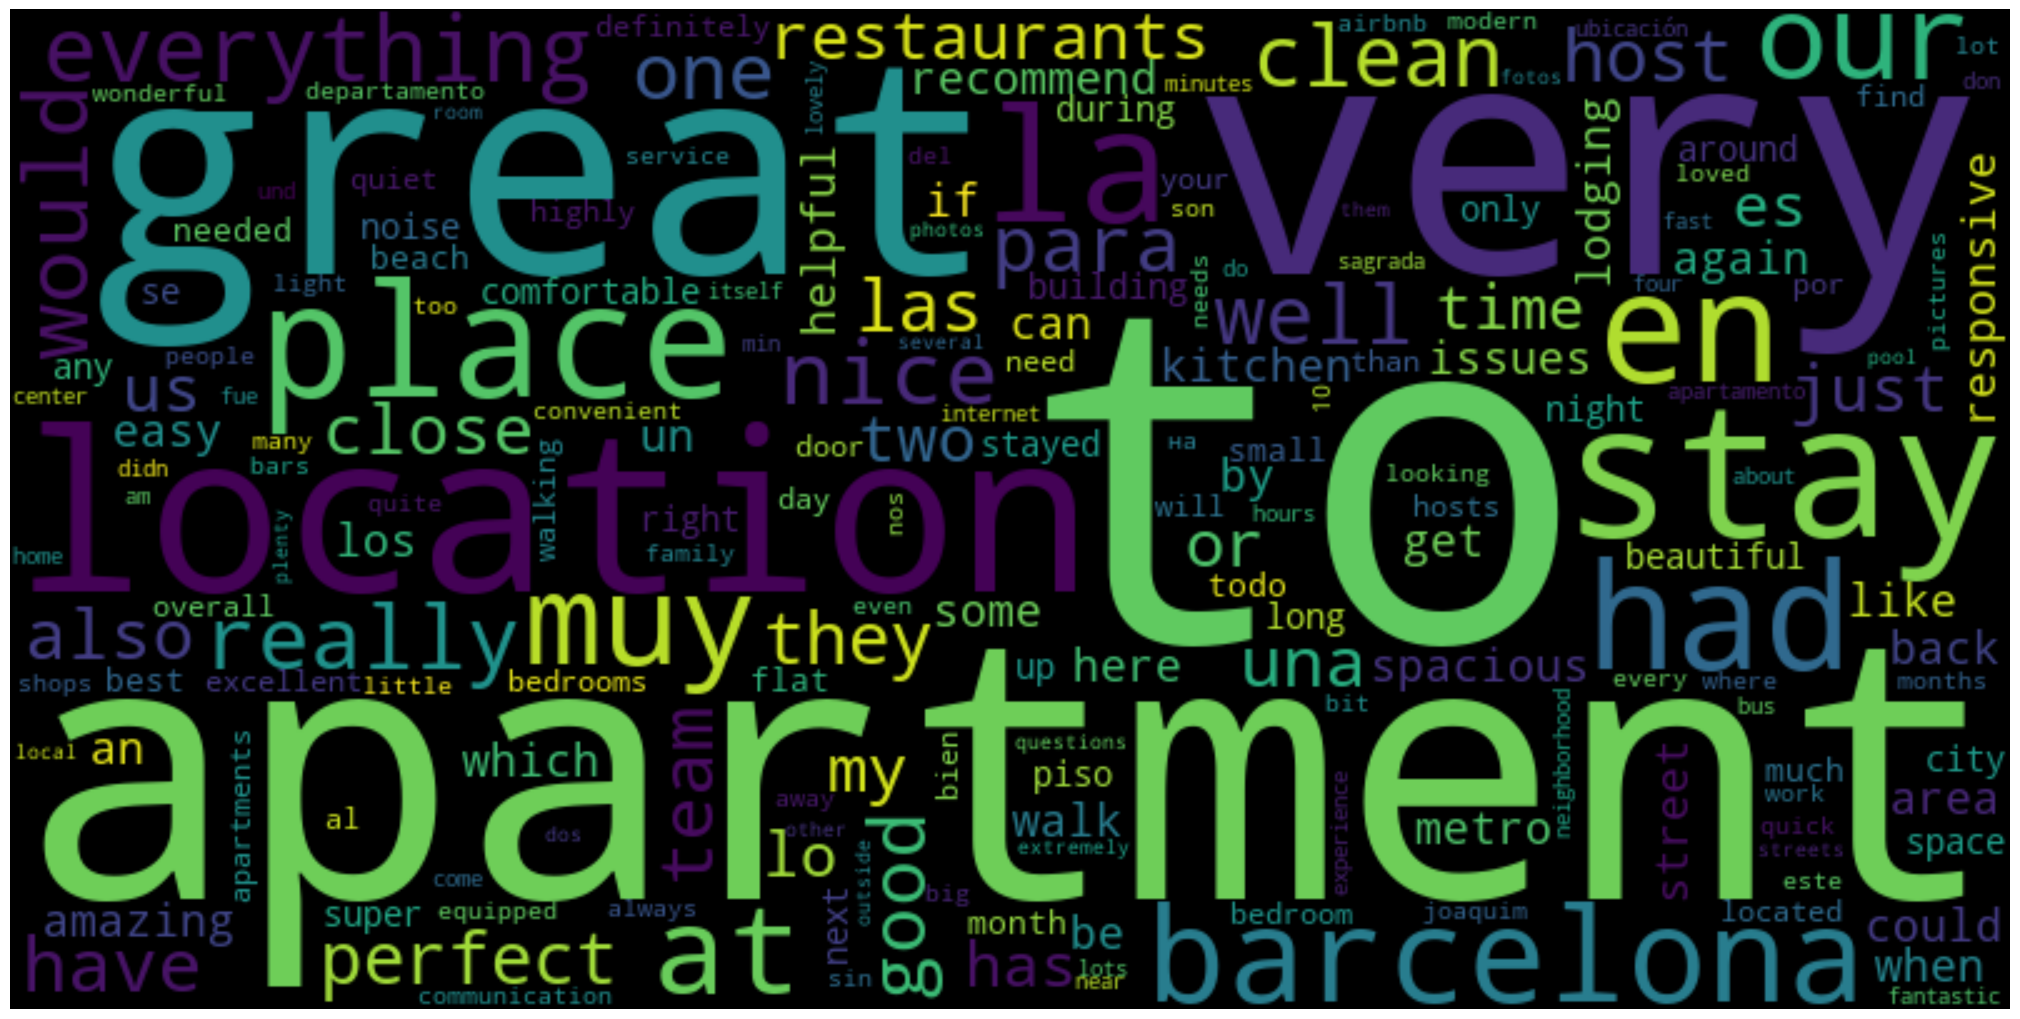

In [ ]:
# Lista de palabras a excluir de la nube de palabras
excluded_words = ['this','for','we','with','out','que','as','that','la''to','is','and','the','br','it', 'there','you','so','el','con','more','from','all', 'was', 'in', 'de','for''of','no','but','were','on','are','of','not']

# Filtramos las palabras excluidas
cvec_df = cvec_top_200[~cvec_top_200['words'].isin(excluded_words)]

# Convertimos el DataFrame filtrado en un diccionario
cvec_dict = dict(zip(cvec_df['words'], cvec_df['counts']))

# Nube de palabras
wordcloud = WordCloud(width=800, height=400) # creamos un objeto WordCloud
wordcloud.generate_from_frequencies(frequencies=cvec_dict) # generamos la nube de palabras
plt.figure(figsize=(20, 10)) # tamaño de la figura
plt.imshow(wordcloud, interpolation="bilinear") # mostramos la nube de palabras
plt.axis("off") # quitamos los ejes
plt.tight_layout(pad=0) # ajustamos el layout
plt.savefig('img/wordcloud1.png') # guardamos la imagen
plt.show()



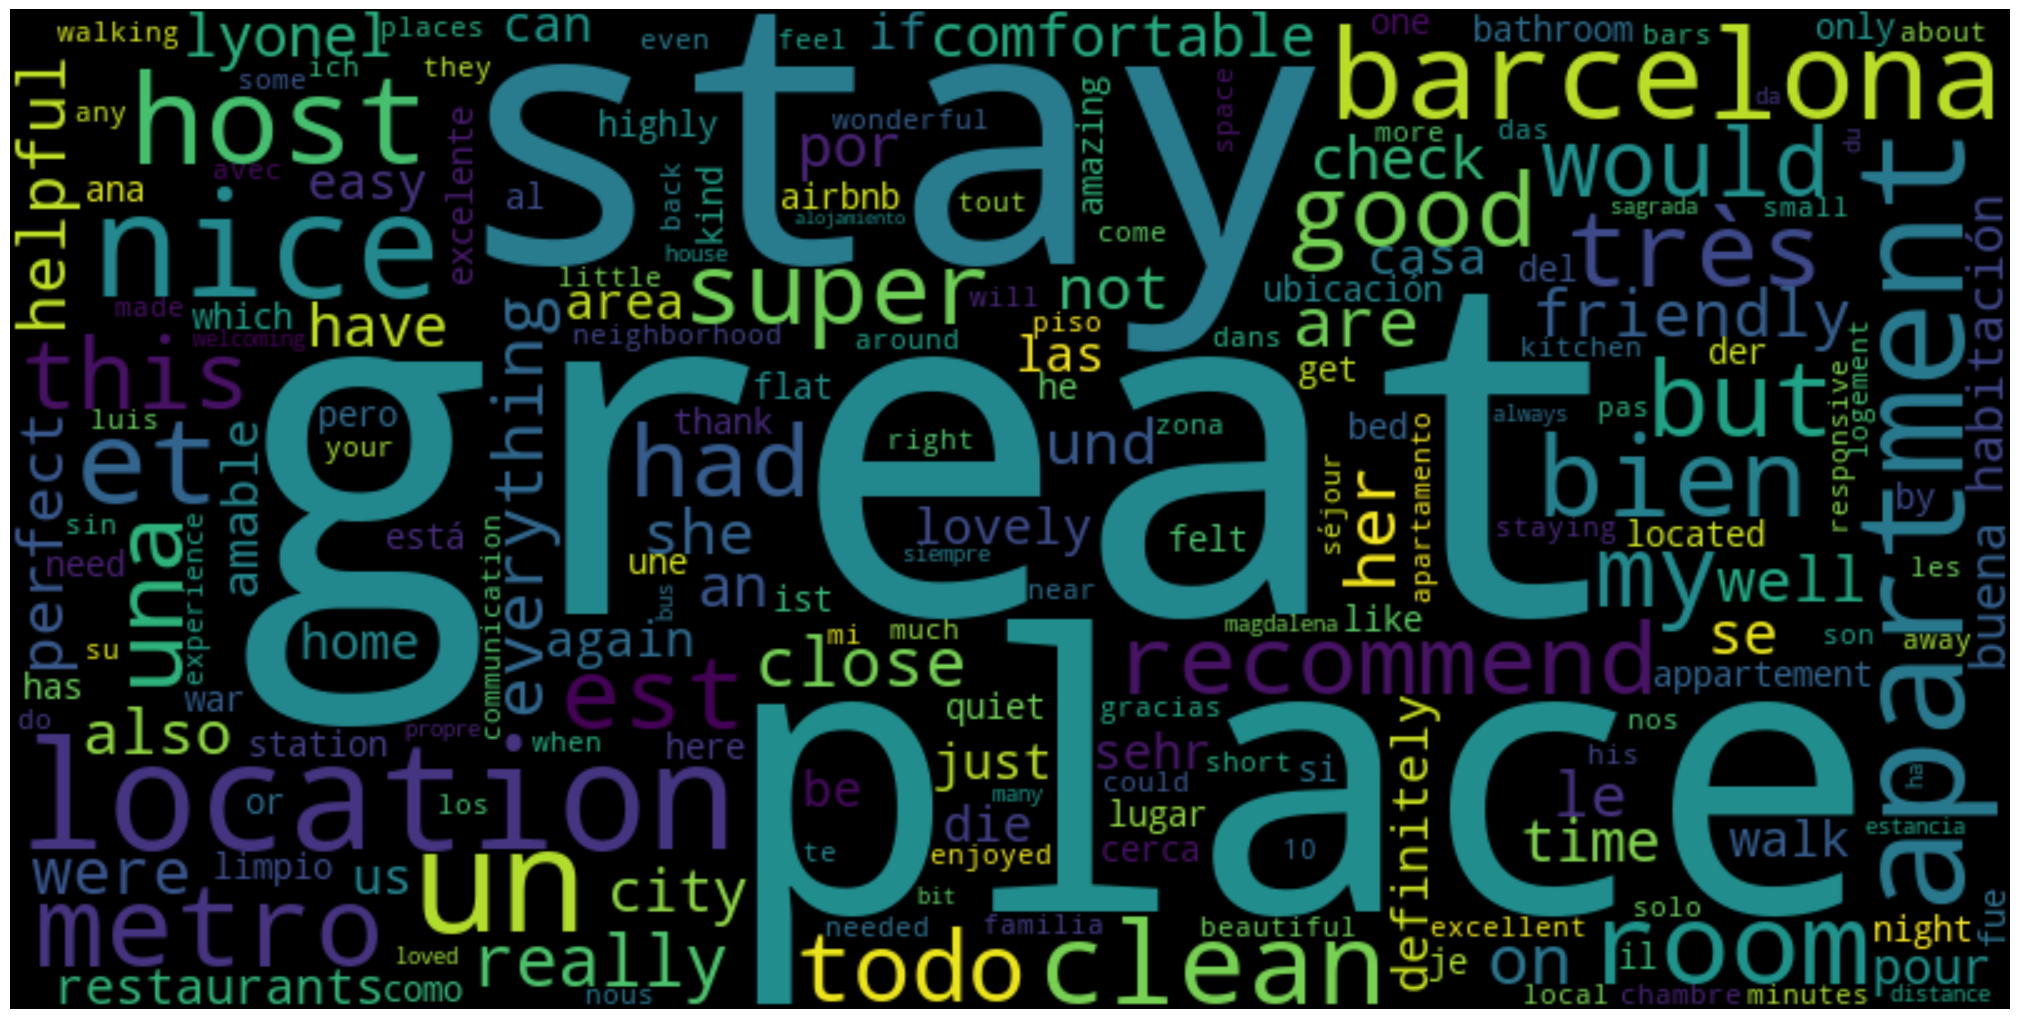

In [ ]:
# GRAFICO DE BOTTOM_200
excluded_words = ['so','para','from','la','we','is','it', 'the','very','muy','for', 'in','es','que','there','of','en','lo','me','and','was','de','you', 'br', 'to','with', 'as','our','out', 'el','all','con','at', 'that','no'] # lista de palabras a excluir de la nube de palabras

# Filtramos las palabras excluidas
cvec_df = cvec_bottom_200[~cvec_bottom_200['words'].isin(excluded_words)] 

cvec_dict = dict(zip(cvec_df['words'], cvec_df['counts'])) # convertimos el dataframe en un diccionario

# Nube de palabras
wordcloud = WordCloud(width=800, height=400) # creamos un objeto WordCloud
wordcloud.generate_from_frequencies(frequencies=cvec_dict) # generamos la nube de palabras
plt.figure(figsize=(20, 10)) # tamaño de la figura
plt.imshow(wordcloud, interpolation="bilinear") # mostramos la nube de palabras
plt.axis("off") # quitamos los ejes
plt.tight_layout(pad=0) # ajustamos el layout
plt.savefig('img/wordcloud2.png') # guardamos la imagen
plt.show()

## ANALISIS SENTIMIENTO DESCRIPCION
En este apartado vamos a analizar las descripciones de cada una los 200 mejores y peores apartamentos de acuerdo a la ponderación que hemos hecho a lo largo del proyecto.

In [ ]:
# Cargamos los dataframes que vamos a utilizar en nuestro analisis
df_listings = pd.read_csv(r'/Users/juliobrionesmorales/Documents/GitHub/Airbnb_Barcelona/data/3. data_sin_outliers/df_reviews')
top_200 = pd.read_csv(r'/Users/juliobrionesmorales/Documents/GitHub/Airbnb_Barcelona/data/4. top200/top_200.csv')
bottom_200 = pd.read_csv(r'/Users/juliobrionesmorales/Documents/GitHub/Airbnb_Barcelona/data/4. top200/bottom_200.csv')

In [ ]:
# Solo cogemos los comentarios de listings
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [ ]:
df_listings_filtered = df_listings.loc[:, ['id', 'description']]

In [ ]:
top_200.columns

Index(['id', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
       'property_type', 'room_type', 'latitude', 'longitude', 'price',
       'minimum_nights', 'maximum_nights', 'accommodates', 'bedrooms', 'beds',
       'number_of_reviews', 'number_of_reviews_ltm', 'reviews_per_month',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'host_is_superhost', 'host_response_rate',
       'host_listings_count', 'availability_365', 'price_normalized',
       'weighted_score'],
      dtype='object')

In [ ]:
df_listings_filtered.columns

Index(['id', 'description'], dtype='object')

In [ ]:
# Unimos los datafarmes
top_200 = pd.merge(top_200, df_listings_filtered, left_on='id', right_on='id', how='inner')
bottom_200 = pd.merge(bottom_200, df_listings_filtered, left_on='id', right_on='id', how='inner')

In [ ]:
top_200.head()

id  neighbourhood_cleansed neighbourhood_group_cleansed  \
0           50861575.00      la Sagrada Família                     Eixample   
1           51759096.00  Sant Gervasi - Galvany          Sarrià-Sant Gervasi   
2 744806258021033088.00       la Vila de Gràcia                       Gràcia   
3           52933728.00       la Vila de Gràcia                       Gràcia   
4           39571615.00                el Raval                 Ciutat Vella   

               property_type        room_type  latitude  longitude  price  \
0  Entire serviced apartment  Entire home/apt     41.40       2.18 122.00   
1         Entire rental unit  Entire home/apt     41.40       2.15 148.00   
2         Entire rental unit  Entire home/apt     41.40       2.16 208.00   
3         Entire rental unit  Entire home/apt     41.40       2.16 159.27   
4         Entire rental unit  Entire home/apt     41.39       2.17  50.00   

   minimum_nights  maximum_nights  accommodates  bedrooms  beds  \
0           76.00         1124.00          6.00      3.00  3.00   
1           76.00          330.00          6.00      3.00  3.00   
2           76.00          330.00          4.00      3.00  3.00   
3           76.00          330.00          2.00      1.00  2.82   
4           76.00          360.00          2.00      0.00  1.00   

   number_of_reviews  number_of_reviews_ltm  reviews_per_month  \
0               2.00                   2.00               0.29   
1               0.00                   0.00               1.00   
2               0.00                   0.00               1.61   
3               0.00                   0.00               1.09   
4               1.00                   1.00               0.16   

   review_scores_rating  review_scores_cleanliness  \
0                  4.50                       4.00   
1                  4.25                       4.33   
2                  4.77                       4.84   
3                  4.64                       4.64   
4                  5.00                       5.00   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         5.00                    4.50                 5.00   
1                         4.50                    4.86                 4.20   
2                         4.71                    4.93                 4.58   
3                         4.73                    4.78                 4.51   
4                         5.00                    5.00                 5.00   

  host_is_superhost host_response_rate  host_listings_count  availability_365  \
0                 f                98%                97.00             76.00   
1                 f                97%                97.00            106.00   
2                 f                97%                97.00            289.00   
3                 f                97%                97.00             43.00   
4                 f                92%                97.00            164.00   

   price_normalized  weighted_score  \
0              0.66           29.88   
1              0.58           29.77   
2              0.40           29.41   
3              0.55           28.78   
4              0.88           28.39   

                                         description  
0  Want to experience the new Barcelona, where av...  
1  Our mission is to empower individuals to immer...  
2  Our mission is to empower individuals to immer...  
3  Our mission is to empower individuals to immer...  
4  A sunny, 35m2, 1-bedroom, 1-bathroom studio  r...

In [ ]:
# Nos quedamos solo con las columnas que nos interesan
top_200 = top_200.loc[:,['id', 'description']]
bottom_200 = bottom_200.loc[:,['id', 'description']]
top_200.head()

id                                        description
0           50861575.00  Want to experience the new Barcelona, where av...
1           51759096.00  Our mission is to empower individuals to immer...
2 744806258021033088.00  Our mission is to empower individuals to immer...
3           52933728.00  Our mission is to empower individuals to immer...
4           39571615.00  A sunny, 35m2, 1-bedroom, 1-bathroom studio  r...

In [61]:
"""
# Definimos una función que detecta el idioma de un texto 
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'

# La aplicamos a la columna de comentarios a nuestros 2 dataframes
top_200['language'] = top_200['description'].apply(detect_language)
bottom_200['language'] = bottom_200['description'].apply(detect_language)

# Guardamos en csv debido a que es una libreria que tarda mucho y no queremos que se ejecute todo el rato, por eso lo dejamos con comentarios
import os
base_path = '/Users/juliobrionesmorales/Documents/GitHub/Airbnb_Barcelona/data/5. language/language_1'
folder_path = os.path.join(base_path)

# Guarda cada DataFrame como un archivo CSV en la carpeta específica
top_200.to_csv(os.path.join(folder_path, 'top_200.csv'), index=False)
bottom_200.to_csv(os.path.join(folder_path, 'bottom_200.csv'), index=False)
"""

"\n# Definimos una función que detecta el idioma de un texto (cuidado que tarda ~15min en ejecutarse)\ndef detect_language(text):\n    try:\n        return detect(text)\n    except:\n        return 'unknown'\n\n# La aplicamos a la columna de comentarios a nuestros 2 dataframes\ntop_200['language'] = top_200['description'].apply(detect_language)\nbottom_200['language'] = bottom_200['description'].apply(detect_language)\n\n# Guardamos en csv debido a que es una libreria que tarda mucho y no queremos que se ejecute todo el rato, por eso lo dejamos con comentarios\nimport os\nbase_path = '/Users/juliobrionesmorales/Documents/1. FORMACION/3. DATA ANALYTICS /PROYECTOS_BOOTCAMP/PROYECTO FINAL 2/data/5. language/language_1'\nfolder_path = os.path.join(base_path)\n\n# Guarda cada DataFrame como un archivo CSV en la carpeta específica\ntop_200.to_csv(os.path.join(folder_path, 'top_200.csv'), index=False)\nbottom_200.to_csv(os.path.join(folder_path, 'bottom_200.csv'), index=False)\n"

In [62]:
# Cargamos el archivo con los idiomas detectados
top_200 = pd.read_csv(r'/Users/juliobrionesmorales/Documents/GitHub/Airbnb_Barcelona/data/5. language/language_1/top_200.csv')
bottom_200 = pd.read_csv(r'/Users/juliobrionesmorales/Documents/GitHub/Airbnb_Barcelona/data/5. language/language_1/bottom_200.csv')

In [63]:
# GRAFICO DE COMENTARIOS POR IDIOMA - TOP200
fig = px.histogram(top_200, x='language', color='language')

# Obtenemos el orden de mayor a menor
language_counts = top_200['language'].value_counts().sort_values(ascending=False)
sorted_languages = language_counts.index.tolist()

# Actualizamos el layout con el orden de las barras
fig.update_layout(
    title_text='Número de comentarios por idioma - TOP_200',
    xaxis=dict(categoryorder='array', categoryarray=sorted_languages)
)

fig.show()

In [64]:
# GRAFICO DE COMENTARIOS POR IDIOMA - TOP200
fig = px.histogram(top_200, x='language', color='language')

# Obtenemos el orden de mayor a menor
language_counts = top_200['language'].value_counts().sort_values(ascending=False)
sorted_languages = language_counts.index.tolist()

# Actualizamos el layout con el orden de las barras
fig.update_layout(
    title_text='Número de comentarios por idioma - TOP_200',
    xaxis=dict(categoryorder='array', categoryarray=sorted_languages)
)

fig.show()

In [65]:
import ssl


# El propósito de este código es manejar la verificación del certificado SSL al realizar solicitudes HTTPS. De forma predeterminada, el módulo ssl de Python verifica los certificados SSL de los sitios web a los que se conecta. Sin embargo, en algunos casos, como cuando se trabaja con certificados autofirmados o en entornos de desarrollo, puede ser necesario deshabilitar la verificación del certificado.

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords') # Descargamos las stopwords
nltk.download('vader_lexicon') # Descargamos el lexicon para el SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/juliobrionesmorales/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/juliobrionesmorales/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [66]:
top_200 = top_200.copy()  # Hacemos una copia del dataframe

# Eliminamos los comentarios nulos
top_200 = top_200[top_200['description'].notnull()]

# Eliminamos los números y convertimos todo a minúsculas
top_200.loc[:, 'description'] = top_200['description'].str.replace('[^a-zA-Z0-9\sáéíóúÁÉÍÓÚñÑçÇ~]+', '').str.lower()
# Eliminamos los caracteres especiales
top_200.loc[:, 'description'] = top_200['description'].str.replace('!()-![]{};:,+\'"\\,<>./?@#$%^&*_~Â', '')
top_200.loc[:, 'description'] = top_200['description'].str.replace(',', '')
# Quitamos los saltos de línea
top_200.loc[:, 'description'] = top_200['description'].str.replace('\r\n', "")

# Quitamos las stopwords en varios idiomas (inglés, español, francés, portugués, alemán, italiano)
stop_words = []
for language in ["english", "spanish", "french", "portuguese", "german", "italian"]:
    stop_words.extend(stopwords.words(language))
top_200.loc[:, 'description'] = top_200['description'].apply(lambda x: " ".join([i for i in x.split() if i not in stop_words]))

# Eliminamos la puntuación y los espacios en blanco
top_200.loc[:, 'description'] = top_200['description'].str.replace('[^\w\s]', " ").str.replace('\s+', ' ')

print("Se han quitado {} stopwords".format(len(stop_words)))
print(top_200.description.values[2])  # Verificamos el resultado


Se han quitado 1367 stopwords
mission empower individuals immerse new places home wherever go. providing artfully designed fully furnished serviced apartments stays one month more. currently present important cities europe


In [67]:
bottom_200 = bottom_200.copy()  # Hacemos una copia del dataframe

# Eliminamos los comentarios nulos
bottom_200 = bottom_200[bottom_200['description'].notnull()]

# Eliminamos los números y convertimos todo a minúsculas
bottom_200.loc[:, 'description'] = bottom_200['description'].str.replace('[^a-zA-Z0-9\sáéíóúÁÉÍÓÚñÑçÇ~]+', '').str.lower()
# Eliminamos los caracteres especiales
bottom_200.loc[:, 'description'] = bottom_200['description'].str.replace('!()-![]{};:,+\'"\\,<>./?@#$%^&*_~Â', '')
bottom_200.loc[:, 'description'] = bottom_200['description'].str.replace(',', '')
# Quitamos los saltos de línea
bottom_200.loc[:, 'description'] = bottom_200['description'].str.replace('\r\n', "")

# Quitamos las stopwords en varios idiomas (inglés, español, francés, portugués, alemán, italiano)
stop_words = []
for language in ["english", "spanish", "french", "portuguese", "german", "italian"]:
    stop_words.extend(stopwords.words(language))
bottom_200.loc[:, 'description'] = bottom_200['description'].apply(lambda x: " ".join([i for i in x.split() if i not in stop_words]))

# Eliminamos la puntuación y los espacios en blanco
bottom_200.loc[:, 'description'] = bottom_200['description'].str.replace('[^\w\s]', " ").str.replace('\s+', ' ')

print("Se han quitado {} stopwords".format(len(stop_words)))
print(bottom_200.description.values[2])  # Verifica el resultado



Se han quitado 1367 stopwords
welcome airbnb rental room located city center peaceful quiet apartment. <br /><br />this cozy room great place relax recharge busy day exploring wonders city. warmly welcomed thoughtfully furnished space cozy bed.


In [68]:
# TOP_200

texts = top_200.description.tolist() 

vec = CountVectorizer().fit(texts) # CountVectorizer tokeniza la colección de documentos y construye el vocabulario
bag_of_words = vec.transform(texts) # transforma el texto en una matriz de tokens
sum_words = bag_of_words.sum(axis=0) # suma las palabras por columna
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]  # devuelve una lista de palabras y su frecuencia

cvec_top_200 = pd.DataFrame.from_records(words_freq, columns= ['words', 'counts']).sort_values(by="counts", ascending=False) # creamos un dataframe con las palabras y su frecuencia
cvec_top_200.head(10)

words  counts
26       fully     129
31         one     102
29  apartments     102
20        home     101
27   furnished      94
13   apartment      87
28    serviced      82
21    wherever      82
2          new      77
25    designed      77

In [69]:
# BOTTOM_200

texts = bottom_200.description.tolist() 

vec = CountVectorizer().fit(texts) # CountVectorizer tokeniza la colección de documentos y construye el vocabulario
bag_of_words = vec.transform(texts) # transforma el texto en una matriz de tokens
sum_words = bag_of_words.sum(axis=0) # suma las palabras por columna
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]  # devuelve una lista de palabras y su frecuencia

cvec_bottom_200= pd.DataFrame.from_records(words_freq, columns= ['words', 'counts']).sort_values(by="counts", ascending=False) # creamos un dataframe con las palabras y su frecuencia
cvec_bottom_200.head(10)

words  counts
38         br     233
10       room     108
15  barcelona      80
56      quiet      73
57  apartment      63
30    minutes      54
98      enjoy      50
53    located      46
33       city      40
73       home      38

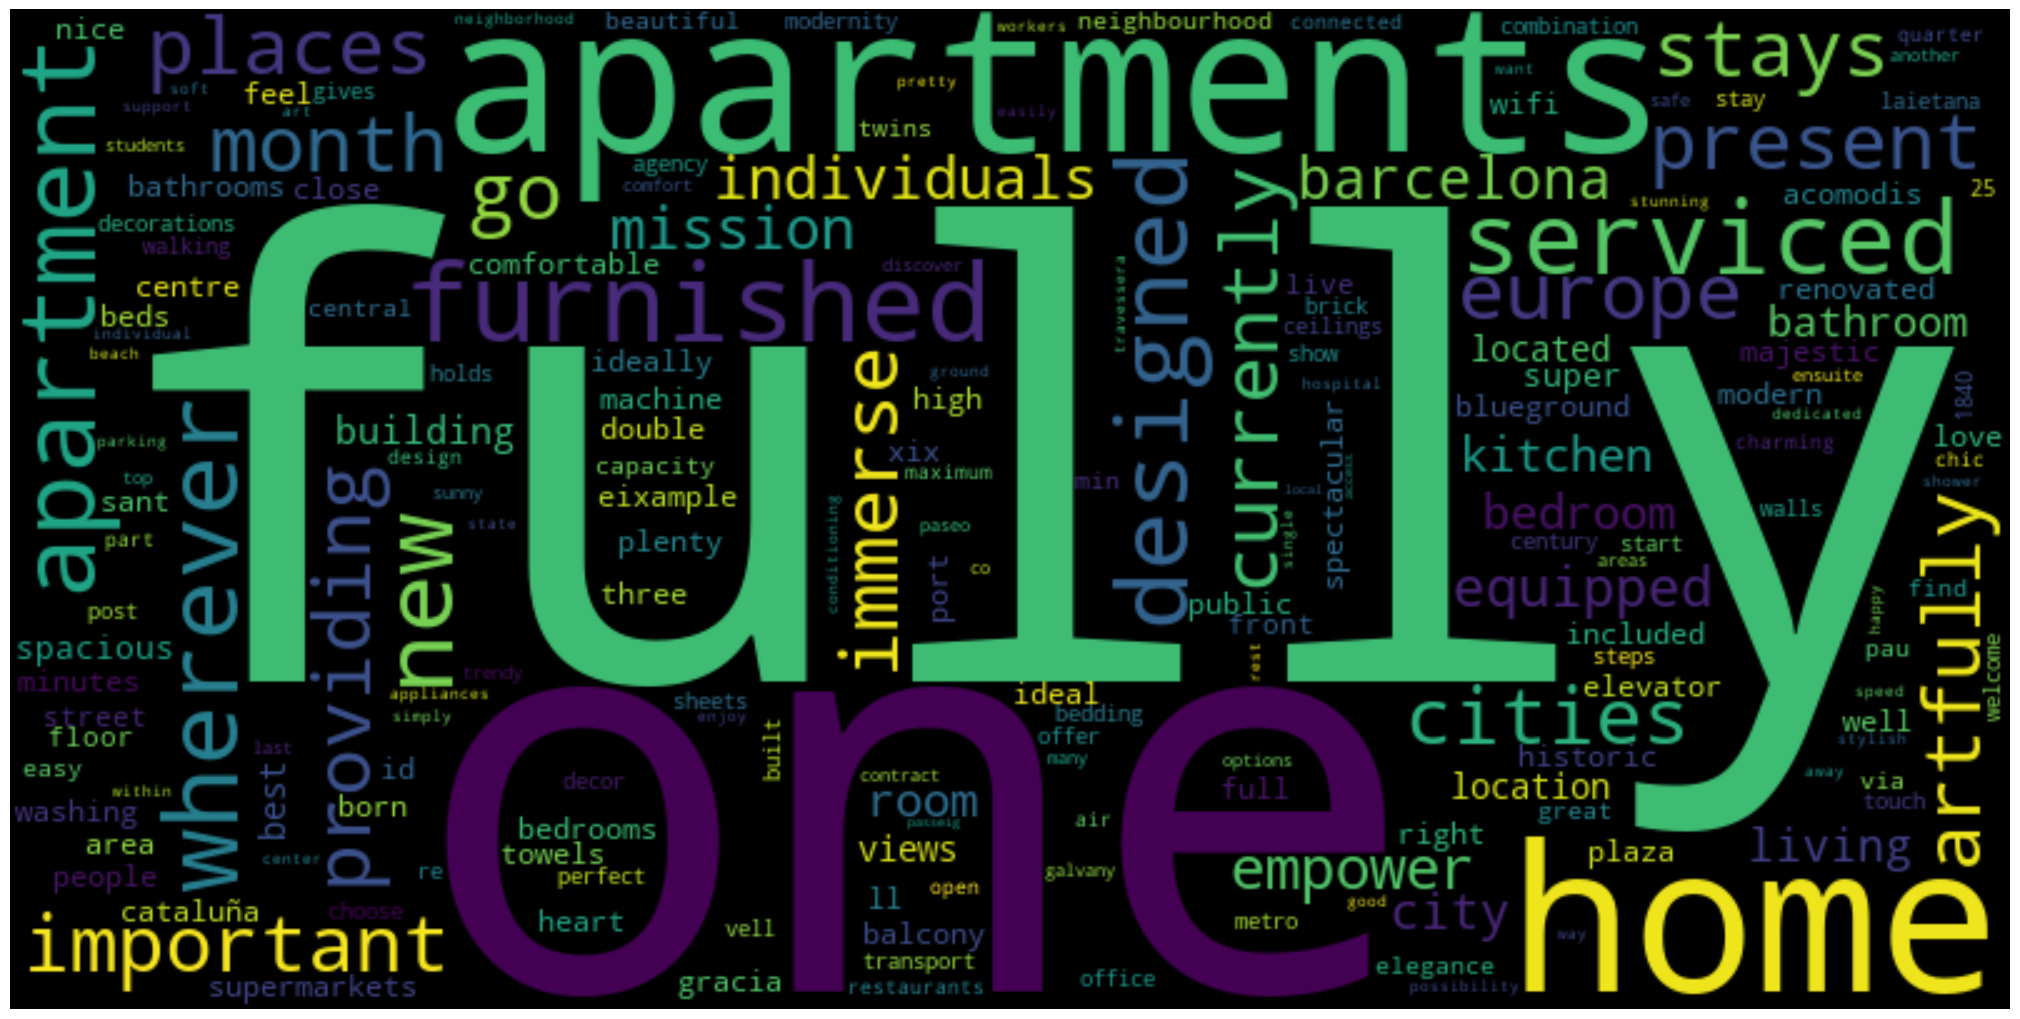

In [70]:
# Lista de palabras a excluir de la nube de palabras
excluded_words = ['this','for','we','with','out','que','as','that','la''to','is','and','the','br','it', 'there','you','so','el','con','more','from','all', 'was', 'in', 'de','for''of','no','but','were','on','are','of','not']

# Filtramos las palabras excluidas
cvec_df = cvec_top_200[~cvec_top_200['words'].isin(excluded_words)]

# Convertimos el DataFrame filtrado en un diccionario
cvec_dict = dict(zip(cvec_df['words'], cvec_df['counts']))

# Nube de palabras
wordcloud = WordCloud(width=800, height=400) # creamos un objeto WordCloud
wordcloud.generate_from_frequencies(frequencies=cvec_dict) # generamos la nube de palabras
plt.figure(figsize=(20, 10)) # tamaño de la figura
plt.imshow(wordcloud, interpolation="bilinear") # mostramos la nube de palabras
plt.axis("off") # quitamos los ejes
plt.tight_layout(pad=0) # ajustamos el layout
plt.savefig('img/wordcloud3.png') # guardamos la imagen
plt.show()

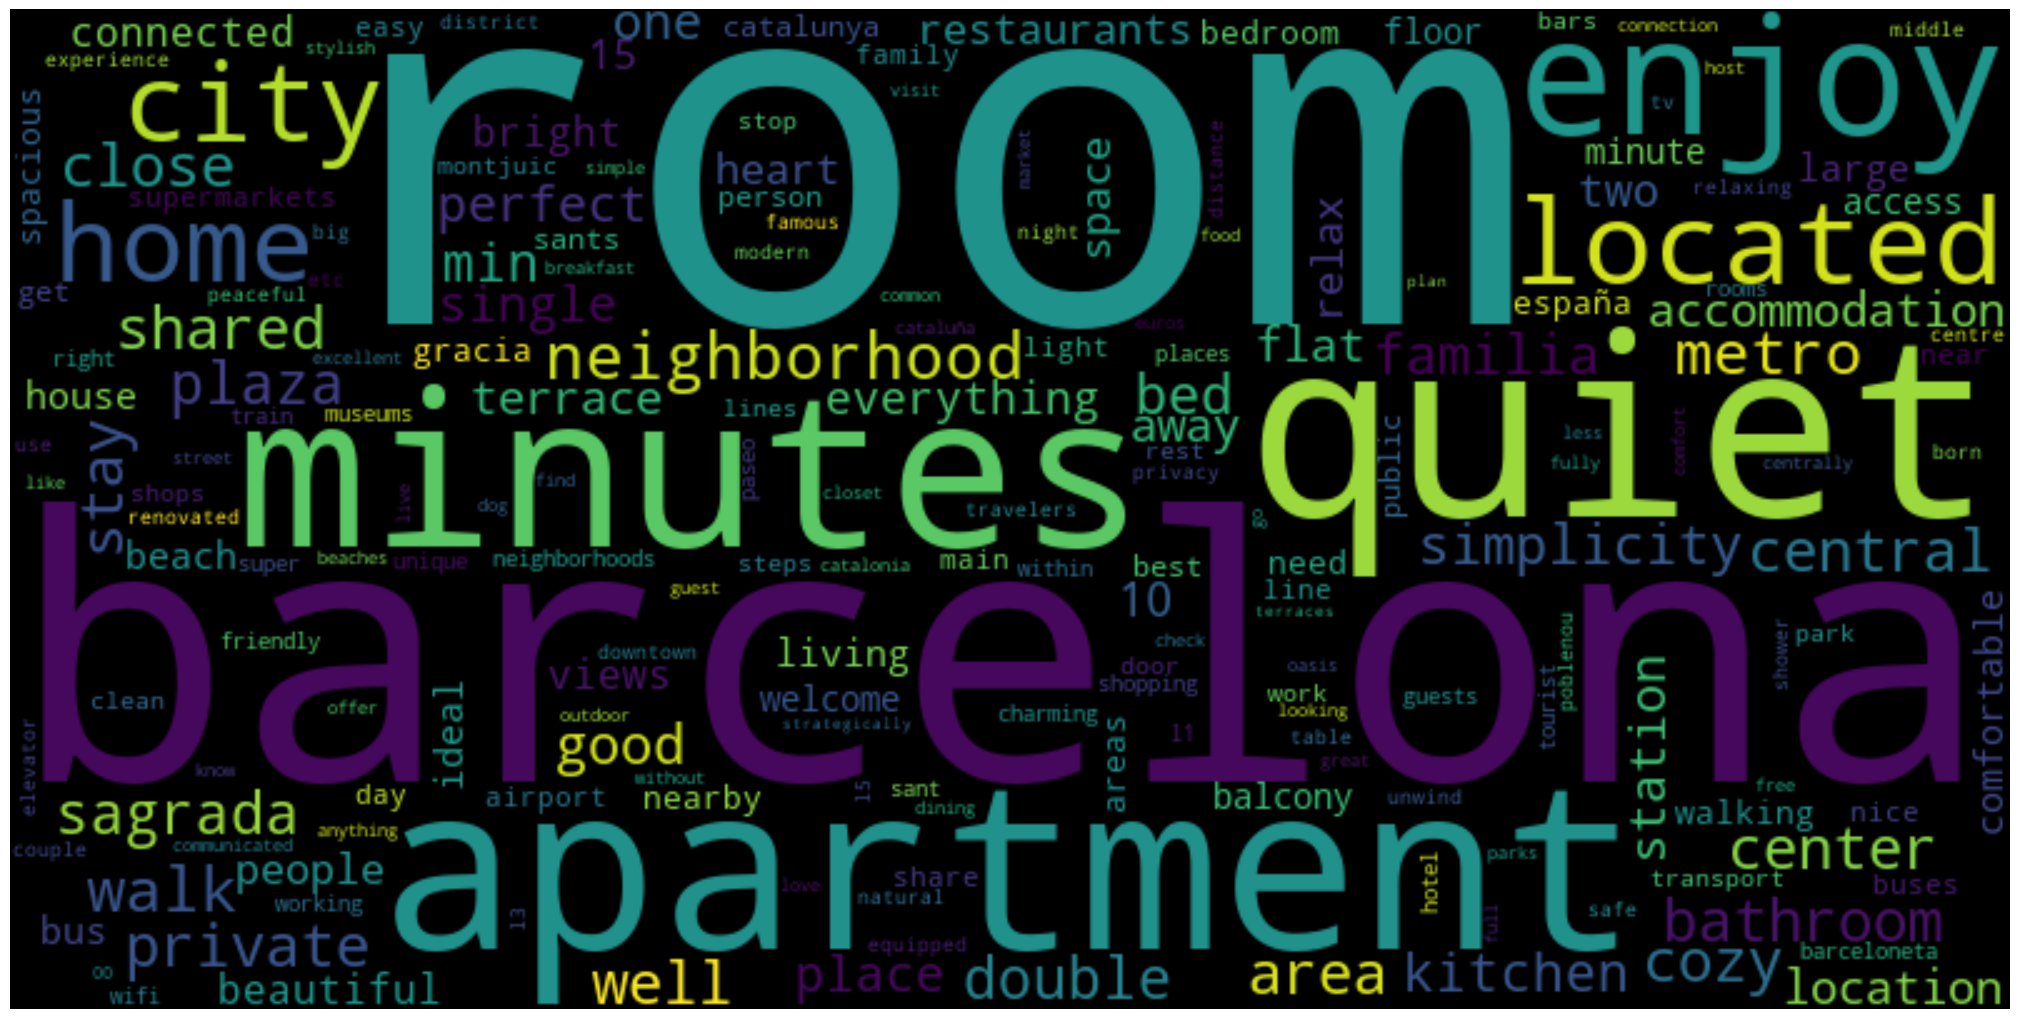

In [71]:
# GRAFICO DE BOTTOM_200
excluded_words = ['so','para','from','la','we','is','it', 'the','very','muy','for', 'in','es','que','there','of','en','lo','me','and','was','de','you', 'br', 'to','with', 'as','our','out', 'el','all','con','at', 'that','no'] # lista de palabras a excluir de la nube de palabras

# Filtramos las palabras excluidas
cvec_df = cvec_bottom_200[~cvec_bottom_200['words'].isin(excluded_words)] 

cvec_dict = dict(zip(cvec_df['words'], cvec_df['counts'])) # convertimos el dataframe en un diccionario

# Nube de palabras
wordcloud = WordCloud(width=800, height=400) # creamos un objeto WordCloud
wordcloud.generate_from_frequencies(frequencies=cvec_dict) # generamos la nube de palabras
plt.figure(figsize=(20, 10)) # tamaño de la figura
plt.imshow(wordcloud, interpolation="bilinear") # mostramos la nube de palabras
plt.axis("off") # quitamos los ejes
plt.tight_layout(pad=0) # ajustamos el layout
plt.savefig('img/wordcloud4.png') # guardamos la imagen
plt.show()